In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to Machine Learning, Artificial Intelligence and Deep Learning

## Session 03a - Classification - Lecture

###  Part 1: Supervised Machine Learning Algorithms

<img src='../../prasami_images/prasami_color_tutorials_small.png' style = 'width:400px;' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

In [2]:
###------------------
### Import statements
###------------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
'../../input'

'../../input'

In [4]:
os.path.join('..', '..', 'input')

'../../input'

In [5]:
###---------------------------------------
### Some Basic Parameters for housekeeping
###--------------------------------------

# set location of input files:
inpDir = os.path.join('..', '..', 'input')

# set location of inputs for this module
moduleDir = 'machine_learning'

# set location of output files
outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 9),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);


TEST_SIZE = 0.25

<Figure size 1500x900 with 0 Axes>

## Naive Bayes

P(X|Y) = $\frac{P(Y|X)P(Y)}{P(X)}$

<div>
    <img src = '../../images/iris.png' width='500 px' align ='left'>
    <img src = '../../images/iris_petal_sepal.png' width='200 px',  align ='left'>
    <img src='../../images/petal_sepal.png' style = 'width:150px;' alt="iris images" align="right"/>

</div>


<hr>

### DataSet
1. Number of Instances: 150 (50 in each of three classes)
2. Number of Attributes: 4 numeric, predictive attributes and the class
3. Attribute Information:

   a. sepal length in cm
   
   b. sepal width in cm
   
   c. petal length in cm
   
   d. petal width in cm
   
   e. class:
      - Iris Setosa
      - Iris Versicolour
      - Iris Virginica
      
      
4. Missing Attribute Values: None
5. Class Distribution: 33.3% for each of 3 classes.


## Loading from CSV

In [6]:
# Path where csv file is
csvPath = os.path.join(inpDir, moduleDir, 'iris.csv')
csvPath

'../../input/machine_learning/iris.csv'

In [7]:
# Column Names
iris_cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target']

# Read as a DataFrame
iris_df = pd.read_csv(csvPath, 
                      skiprows= 1, header = None, names = iris_cols)
iris_df

sepal length  sepal width  petal length  petal width  target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]

In [8]:
type(iris_df)

pandas.core.frame.DataFrame

In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
iris_df.describe()

sepal length  sepal width  petal length  petal width      target
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

## Feature Extraction

Extract features and labels from the dataframe.

**Remember:** We can use only numerical values in the features and labels. Incidentally, Iris dataset contains numerical values only.

In [11]:
# Features
X = iris_df.drop('target', axis = 1).to_numpy()

# labels
y = iris_df['target'].to_numpy()

In [12]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [13]:
X.shape

(150, 4)

In [14]:
for col in iris_df:
    print (col, iris_df[col].unique())
    print ('-'*50)

sepal length [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
--------------------------------------------------
sepal width [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
--------------------------------------------------
petal length [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
--------------------------------------------------
petal width [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
--------------------------------------------------
target [0 1 2]
--------------------------------------------------


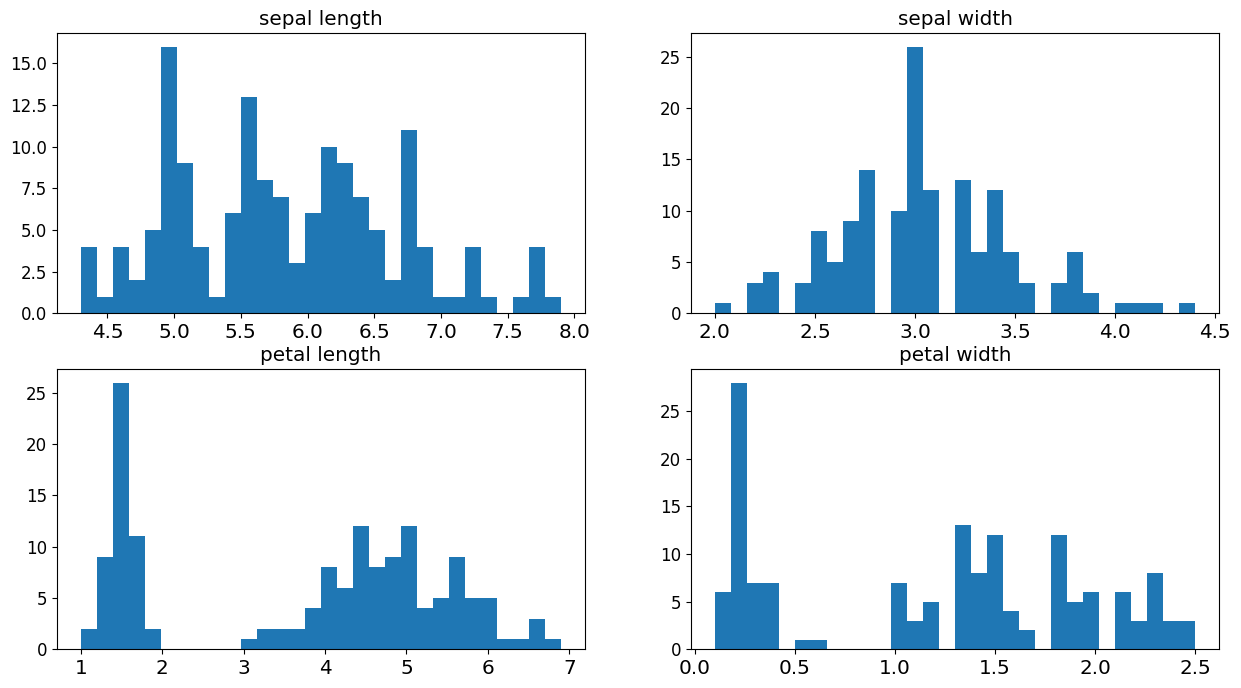

In [15]:
# Good idea to see what is in the features

plt.figure(figsize = (15,8))

for ii in range (X.shape[1]):
    
        plt.subplot(2, 2, ii+1 ) # subplot for each of the column
        
        n, bins, patches = plt.hist( X [ :, ii], 30)
        
        plt.title('{}'.format(iris_cols[ii])) # put column name on the plot
        
        plt.axis('tight')
        
        #plt.legend(loc = 'best')
plt.show()

## Classifier

$Initialization \rightarrow fit \rightarrow predict$

> from sklearn.naive_bayes import GaussianNB

> clf = GaussianNB()

> clf.fit(features, labels)

> y_pred = clf.predict(features)

> target_names = ['setosa','versicolor','virginica']


In [16]:
# Import Classifier
from sklearn.naive_bayes import GaussianNB

# Instantiate
clf = GaussianNB()

# Fit
clf.fit(X, y)

GaussianNB()

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
# Make Predictions
y_pred = clf.predict(X)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
iris_df.head()

sepal length  sepal width  petal length  petal width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

In [20]:
#ax.scatter?

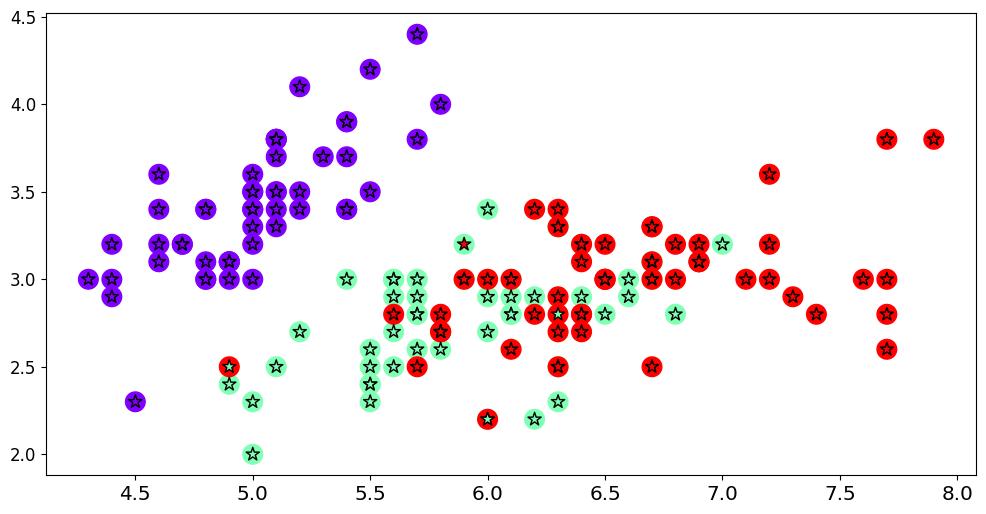

In [23]:
fig = plt.figure(figsize = (12,6))

target_nms = [ 'Setosa','Versicolour','Virginica']

X_plot = iris_df['sepal length'].to_numpy() 

Y_plot = iris_df['sepal width'].to_numpy()

ax = fig.add_subplot()
ax.scatter(X_plot, Y_plot, c = y, s = 200)
ax.scatter(X_plot, Y_plot, c = y_pred, edgecolors='k', marker = '*', s = 100);

We can also use `sklearn` built-in function to calculate accuracy.

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.96

## Support Vector Machines

The line that maximizes the minimum margin.

The model class of 'hyper-planes with a margin of m' has a low VC dimension if m is big.
This maximum-margin separator is determined by a subset of the datapoints.
Datapoints in this subset  are called “support vectors”.
It will be useful computationally if only a small fraction of the datapoints are support vectors, because we use the support vectors to decide which side of the separator a test case is on.

In [25]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X, y)

SVC(gamma='auto')

In [26]:
y_pred = clf.predict(X)

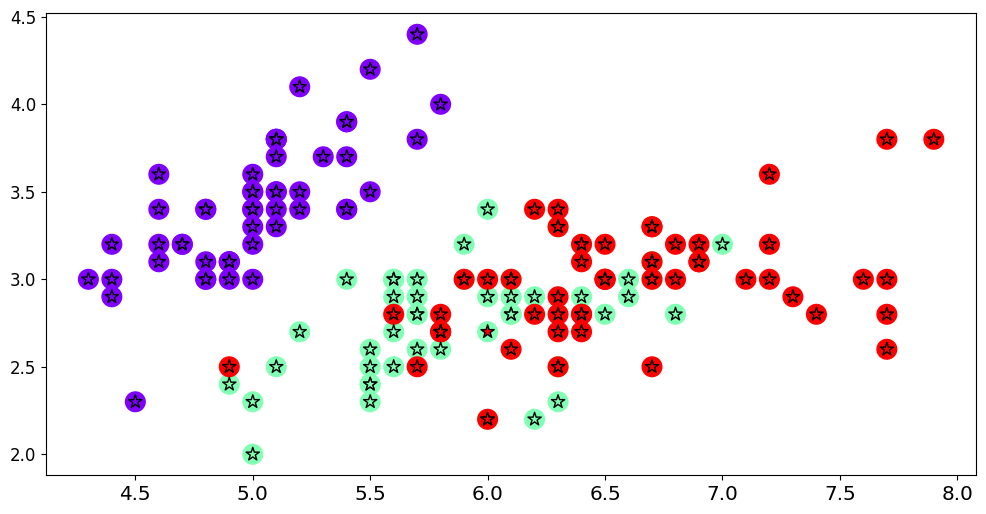

In [28]:
fig = plt.figure(figsize = (12,6))

target_nms = [ 'Setosa','Versicolour','Virginica']
X_plot = iris_df['sepal length'].to_numpy() 

Y_plot = iris_df['sepal width'].to_numpy()

ax = fig.add_subplot()

ax.scatter(X_plot, Y_plot, c = y, s = 200)

ax.scatter(X_plot, Y_plot, c = y_pred, edgecolors='k', marker = '*', s = 100);

## SKLEARN Data sets
### Toy
- Toy datasets : sklearn.datasets.load_
- Real world datasets : sklearn.datasets.fetch_
- Generate: sklearn.datasets.make_

In [36]:
# Import Datasets
from sklearn import datasets

# Use `make_blob` create data with 50 rows  2 columns and 2 classes
data = datasets.make_blobs(n_samples=50,  # How many data points
                           n_features=2, # number of features
                           centers=2,  # how many classes
                           random_state=RANDOM_STATE, 
                           cluster_std=0.9)

In [37]:
X, y = data
X.shape, y.shape

((50, 2), (50,))

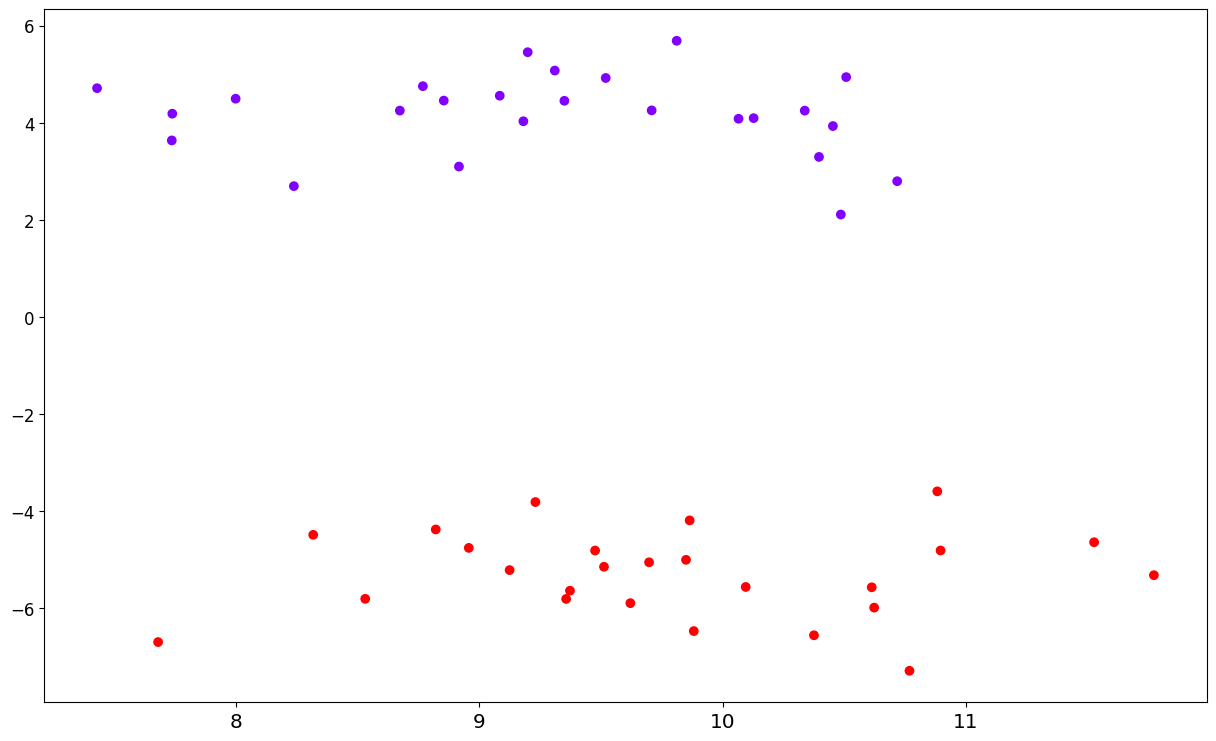

In [38]:
plt.scatter(X[:, 0], X[:, 1], c = y);

In [39]:
clf = SVC(kernel = 'rbf')
clf.fit(X, y)
y_pred  = clf.predict(X)

accuracy_score(y, y_pred)

1.0

In [40]:
clf.support_vectors_

array([[10.4864314 ,  2.10982215],
       [10.71827067,  2.79687417],
       [ 8.23661144,  2.69539905],
       [ 8.31616359, -4.49098432],
       [ 9.86466167, -4.1934771 ],
       [10.88317729, -3.59511057],
       [ 9.23011842, -3.81537855]])

#Make predictions using Support Vector Machines
from sklearn.svm import SVC
clf = SVC(kernel='linear')

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=RANDOM_STATE, cluster_std=0.60)

clf.fit(X,y)

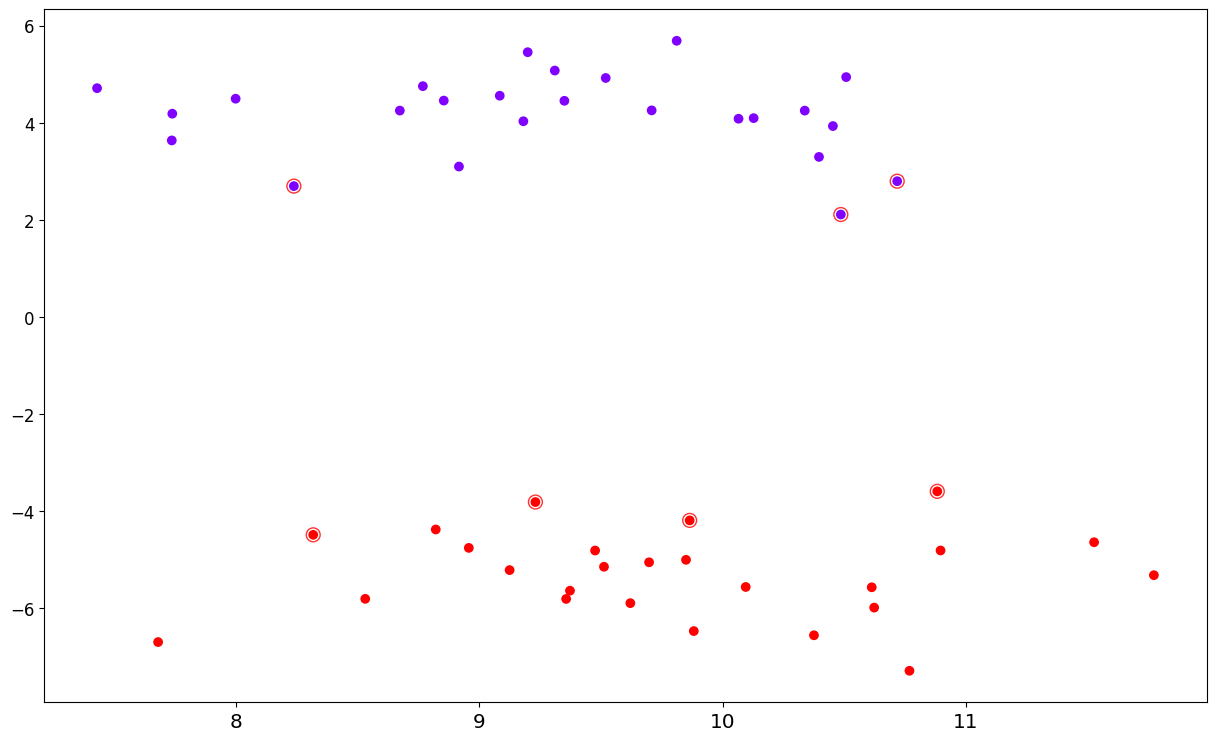

In [41]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s = 100, 
            edgecolors='r',
            facecolor = 'none',
            alpha = 0.8);

# Parameter Tuning
Support vector Machines have a number of tunable parameters. Frequently used ones are :
- Kernel
- C
- Gamma

So, far we have used only kernel = `linear` which uses "one-against-one" approach (Knerr et al., 1990). Other kernels are `poly`, `rbf(Radial Basis Function)`, `sigmoid`, `precomputed` or a callable. If none is given, `rbf` will be used.

## C Value
Let's try to plot using three values of **C ; 0.001, 1, 1000**.

## Kernel
We will be trying three kernels:
- Linear gives linear decision frontiers. It is the most computationally efficient approach and the one that requires the least amount of data.
- rbf uses 'radial basis functions' centered at each support vector to assemble a decision frontier. The size of the RBFs, that ultimately controls the smoothness of the decision frontier. RBFs are the most flexible approach, but also the one that will require the largest amount of data.
- poly gives decision frontiers that are polynomial. The order of this polynomial is given by the 'order' argument.

## Gamma
We will be using three values of **Gamma ; 0.001, 1 and auto**

In [42]:
for c in [0.001, 1, 1000]:
    for k in ['linear', 'rbf', 'poly']:
        for g in [0.001, 1, 'auto']:
            clf = SVC(kernel = k, C=c, gamma=g)
    
            clf.fit(X, y)
            y_pred  = clf.predict(X)

            print (f'C: {c}; kernel: {k}; gamma: {g}|: Acc:{accuracy_score(y, y_pred): .2}')

C: 0.001; kernel: linear; gamma: 0.001|: Acc: 1.0
C: 0.001; kernel: linear; gamma: 1|: Acc: 1.0
C: 0.001; kernel: linear; gamma: auto|: Acc: 1.0
C: 0.001; kernel: rbf; gamma: 0.001|: Acc: 1.0
C: 0.001; kernel: rbf; gamma: 1|: Acc: 1.0
C: 0.001; kernel: rbf; gamma: auto|: Acc: 1.0
C: 0.001; kernel: poly; gamma: 0.001|: Acc: 1.0
C: 0.001; kernel: poly; gamma: 1|: Acc: 1.0
C: 0.001; kernel: poly; gamma: auto|: Acc: 1.0
C: 1; kernel: linear; gamma: 0.001|: Acc: 1.0
C: 1; kernel: linear; gamma: 1|: Acc: 1.0
C: 1; kernel: linear; gamma: auto|: Acc: 1.0
C: 1; kernel: rbf; gamma: 0.001|: Acc: 1.0
C: 1; kernel: rbf; gamma: 1|: Acc: 1.0
C: 1; kernel: rbf; gamma: auto|: Acc: 1.0
C: 1; kernel: poly; gamma: 0.001|: Acc: 1.0
C: 1; kernel: poly; gamma: 1|: Acc: 1.0
C: 1; kernel: poly; gamma: auto|: Acc: 1.0
C: 1000; kernel: linear; gamma: 0.001|: Acc: 1.0
C: 1000; kernel: linear; gamma: 1|: Acc: 1.0
C: 1000; kernel: linear; gamma: auto|: Acc: 1.0
C: 1000; kernel: rbf; gamma: 0.001|: Acc: 1.0
C: 1000;

The unique thing about SVM is that **only the support vectors matter**; that is, if you moved any of the other points without letting them cross the decision boundaries, they would have no effect on the classification results!

## Lets load some more data

> digits = sklearn.datasets.load_digits()

> print(digits.keys())

>X_train, X_test, y_train, y_test = train_test_split(
    digits.data, 
    digits.target, 
    stratify=digits.target, 
    random_state=RANDOM_STATE)


In [43]:
digits = datasets.load_digits()

print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [44]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [45]:
digits.data.max()

16.0

In [46]:
pd.DataFrame(digits.data)

0    1     2     3     4     5    6    7    8    9   ...   54   55   
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  \
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  8.0  0.0   

       56   57   58    59    60    61   62   63  
0     0.0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1     0.0  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2     0.0  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3     0.0  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4     0.0  0.0  0.0   2.0  16.0   4.0  0.0  0.0  
...   ...  ...  ...   ...   ...   ...  ...  ...  
1792  0.0  0.0  2.0  14.0  15.0   9.0  0.0  0.0  
1793  0.0  0.0  6.0  16.0  14.0   6.0  0.0  0.0  
1794  0.0  0.0  2.0   9.0  13.0   6.0  0.0  0.0  
1795  0.0  0.0  5.0  12.0  16.0  12.0  0.0  0.0  
1796  0.0  1.0  8.0  12.0  14.0  12.0  1.0  0.0  

[1797 rows x 64 columns]

In [47]:
digits.target.max()

9

In [48]:
X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [49]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= TEST_SIZE,
                                                    stratify=y, 
                                                    random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [50]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Kernel: linear: - Acc: 0.98  - F1:0.9801
Kernel: rbf: - Acc: 0.9844  - F1:0.9844
Kernel: poly: - Acc: 0.9889  - F1:0.9889


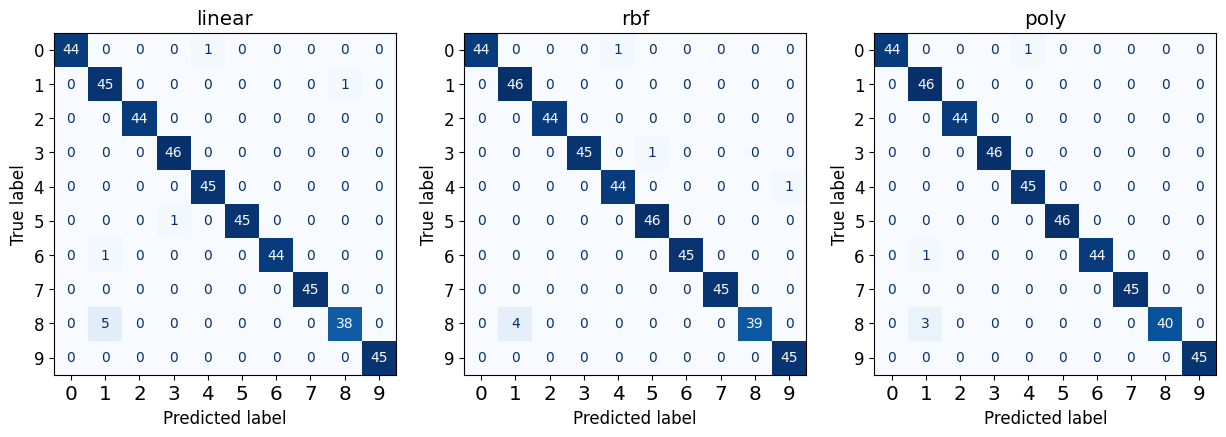

In [51]:
fig, axes = plt.subplots(1,3, figsize = (15,6))
i = 0
for k in ['linear', 'rbf', 'poly']:
    clf = SVC(kernel = k)
    clf.fit(X_train, y_train)
    y_pred  = clf.predict(X_test)
    print (f'Kernel: {k}: - Acc:{accuracy_score(y_test, y_pred): .4}', end = ' ')
    print (f' - F1:{f1_score(y_test, y_pred, average="weighted"):0.4f}')
    cm = confusion_matrix(y_test, y_pred)
    #print (cm)
    #print ('-'*50)
    ax = axes[i]
    ax.set_title(k)
    i = i+1
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=digits.target_names
                                 )
    disp.plot(ax =ax, cmap = plt.cm.Blues, colorbar=False)
    

## Linear models for classification

Linear models are also extensively used for classification. 

A prediction is made using the following formula:

$\hat{y} = w_{0}*x_{0} + w_{1}*x_{1} + ... + w_{p}*x_{p} + b > 0$

Now instead of just returning the weighted sum of the features, we threshold the predicted value at zero. If the function is smaller than zero, we predict the class –1; if it is larger than zero, we predict the class +1.

The two most common linear classification algorithms are **logistic regression** and linear **support vector machines
(linear SVMs)**.

Despite its name, logistic regression is a classification algorithm and not a regression algorithm, and it should not be confused with linear Regression.

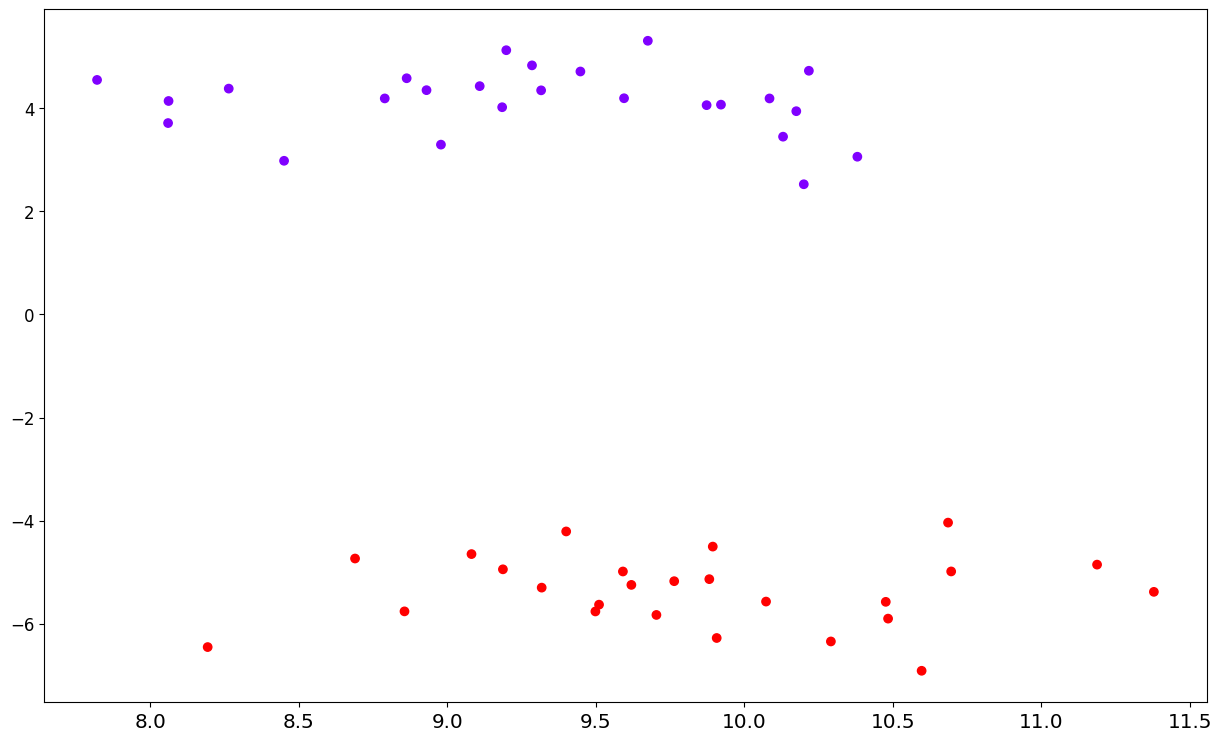

In [52]:
X, y = datasets.make_blobs(n_samples=50, centers=2, random_state=RANDOM_STATE, cluster_std=0.7)

plt.scatter(X[:,0], X[:,1], c = y)

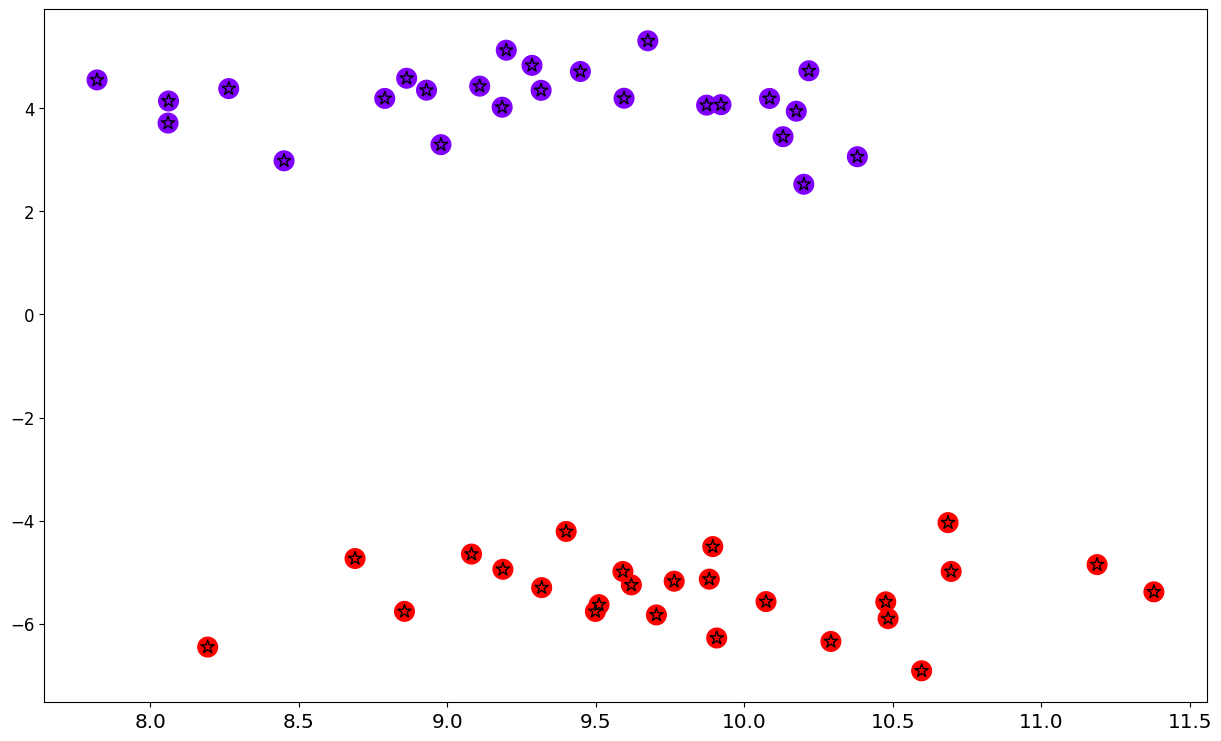

In [55]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X,y)

y_pred = clf.predict(X)

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X[:, 0], X[:,1], c = y, s = 200)

ax.scatter(X[:, 0], X[:,1], c = y_pred, edgecolors='k', marker = '*', s = 100);

## Decision Trees
Decision trees at their root are extremely intuitive.  They encode a series of binary choices in a process that parallels how a person might classify things themselves, but using an information criterion to decide which question is most fruitful at each step.  Its like playing 20-questions game.

For example, if you wanted to create a guide to identifying an animal found in nature, you might ask the following series of questions:

- Is the animal bigger or smaller than a meter long?
    + *bigger*: does the animal have horns?
        - *yes*: are the horns longer than ten centimeters?
        - *no*: is the animal wearing a collar
    + *smaller*: does the animal have two or four legs?
        - *two*: does the animal have wings?
        - *four*: does the animal have a bushy tail?

and so on.  This binary splitting of questions is the essence of a decision tree.

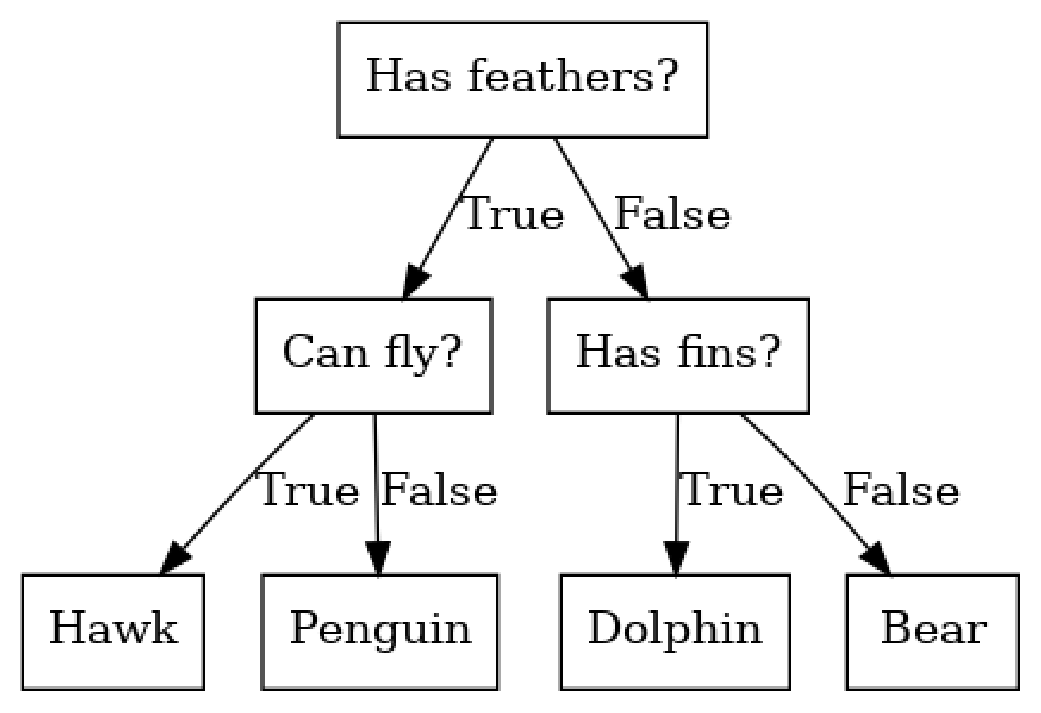

In [56]:
import graphviz

import matplotlib.image as mpimg

#Instantiate the Graph
decision_tree = graphviz.Digraph(node_attr={'shape': 'box'},
                                 edge_attr={'labeldistance': "10.5"},
                                 format="png")

###---------------
### add some nodes
###---------------
decision_tree.node("0", "Has feathers?")

decision_tree.node("1", "Can fly?")

decision_tree.node("2", "Has fins?")

decision_tree.node("3", "Hawk")

decision_tree.node("4", "Penguin")

decision_tree.node("5", "Dolphin")

decision_tree.node("6", "Bear")

###---------------
### add some edges
###---------------
decision_tree.edge("0", "1", label="True")

decision_tree.edge("0", "2", label="False")

decision_tree.edge("1", "3", label="True")

decision_tree.edge("1", "4", label="False")

decision_tree.edge("2", "5", label="True")

decision_tree.edge("2", "6", label="False")

decision_tree.render("images/decision_tree")

fig, ax = plt.subplots()

ax.imshow(mpimg.imread("images/decision_tree.png"))

ax.set_axis_off()

plt.show()

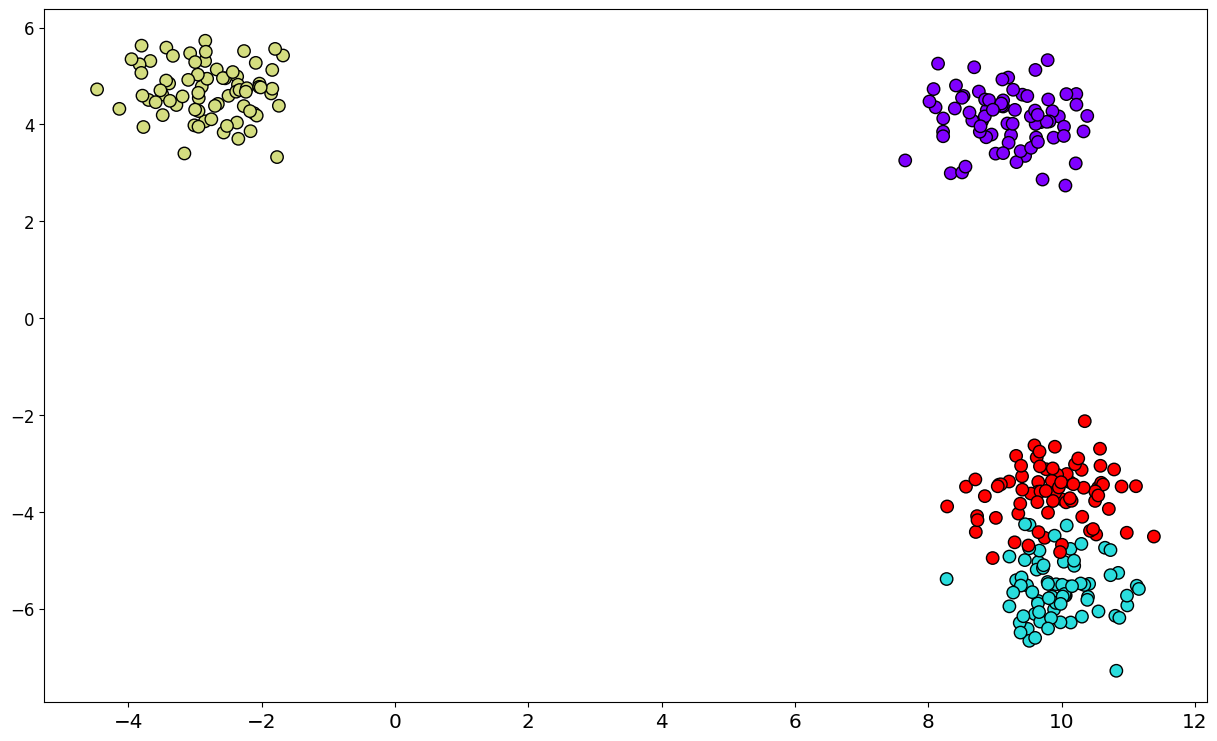

In [57]:
X, y = datasets.make_blobs(n_samples=300, centers=4,
                  random_state=RANDOM_STATE, cluster_std=0.60)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black')

plt.show()

Decision Trees have a number of tunable parameters. 

class sklearn.tree.DecisionTreeClassifier(**criterion**='gini', splitter='best', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, class_weight=None, presort=False)

Parameters of interest are marked in bold.

In [58]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=10)

In [59]:
data = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, 
                                                    test_size= TEST_SIZE,
                                                    stratify=data.target, 
                                                    random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [60]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=24)

In [61]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.8951048951048951)

In [62]:
tree = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE)

tree.fit(X_train, y_train)

print("Accuracy on train set: {:.3f}".format(tree.score(X_train, y_train)))

print("Accuracy on test set : {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on train set: 0.974
Accuracy on test set : 0.909


In [63]:

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=data.feature_names, impurity=False, filled=True)

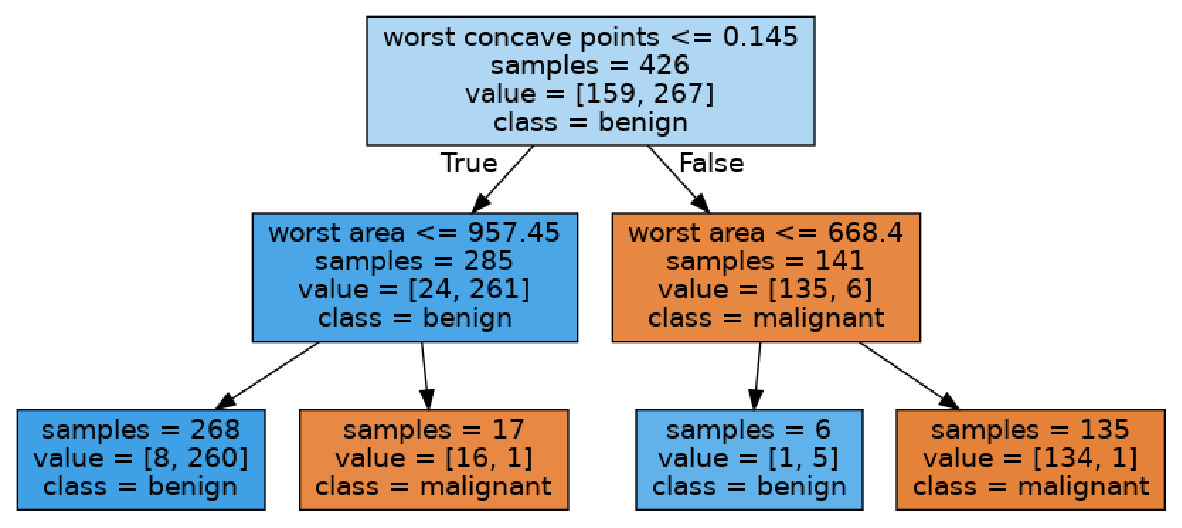

In [64]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
img = graphviz.Source(dot_graph)
! dot -Tpng tree.dot -o tree.png
fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(mpimg.imread("tree.png"));

### Controlling complexity of decision trees

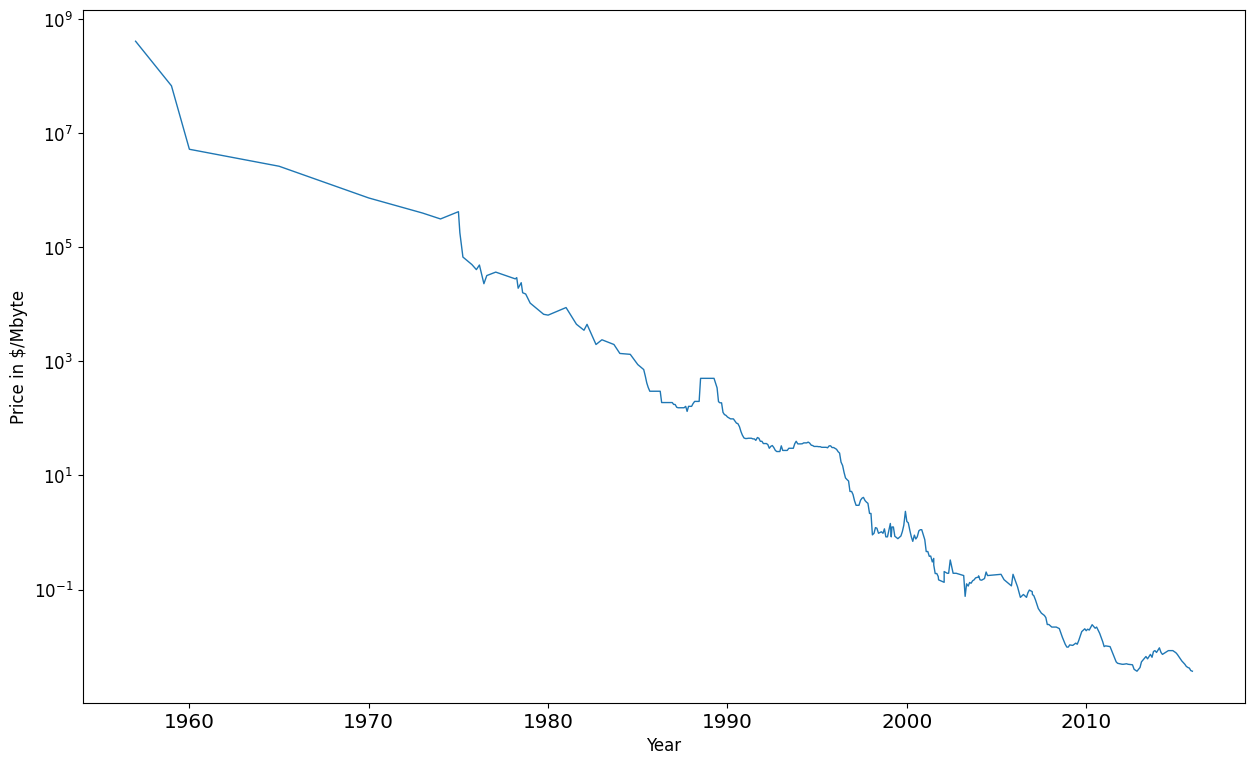

In [65]:
ram_prices = pd.read_csv(os.path.join(inpDir, moduleDir,"ram_price.csv"))

fig, ax = plt.subplots()

ax.semilogy(ram_prices.date, ram_prices.price)
ax.set_xlabel("Year")
ax.set_ylabel("Price in $/Mbyte")
plt.show()

## Decision Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date.to_numpy()[:, np.newaxis]

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)

linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)

pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)

price_lr = np.exp(pred_lr)

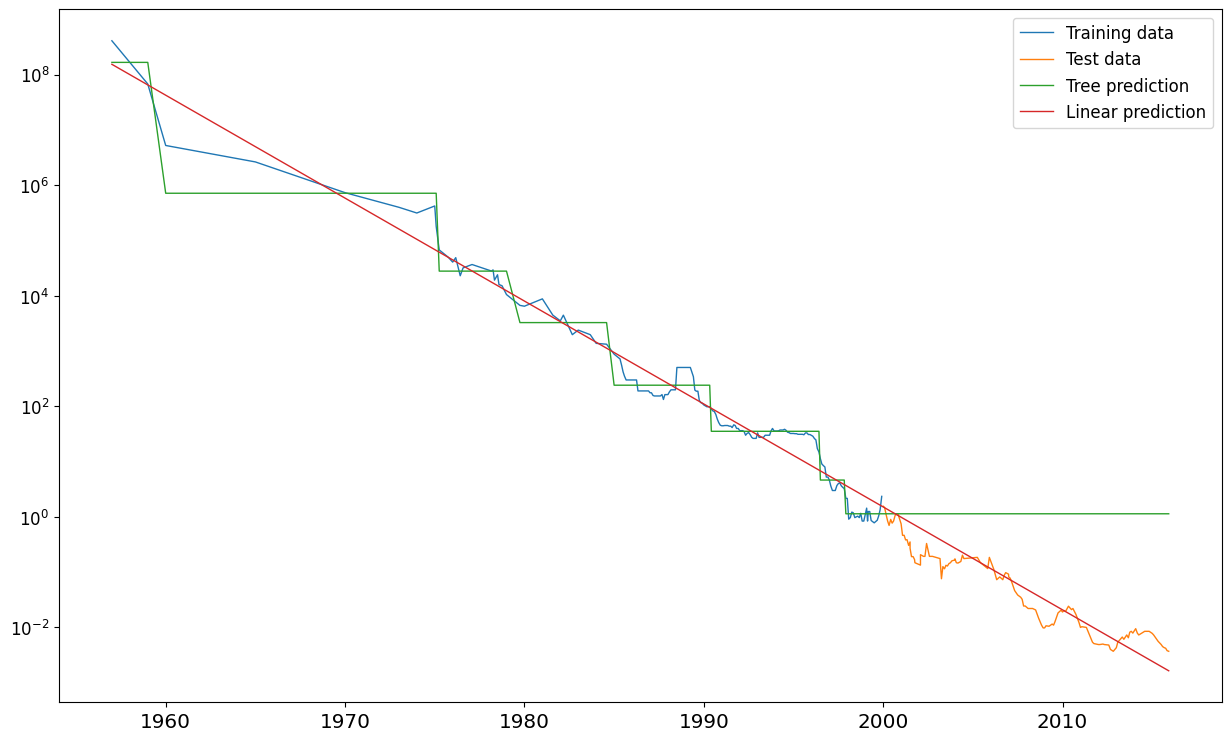

In [67]:
fig, ax = plt.subplots()

ax.semilogy(data_train.date, data_train.price, label="Training data")

ax.semilogy(data_test.date, data_test.price, label="Test data")

ax.semilogy(ram_prices.date, price_tree, label="Tree prediction")

ax.semilogy(ram_prices.date, price_lr, label="Linear prediction")

plt.legend();

## Random Forests

One problem with decision trees is that they can end up **over-fitting** the data. They are such flexible models that, given a large depth, they can quickly memorize the inputs, which doesn't generalize well to previously unseen data. One way to get around this is to use many slightly different decision trees in concert. This is known as **Random Forests**, and is one of the more common techniques of **ensemble learning** (i.e. combining the results from several estimators.

<img src = '../../images/ensamble.png' alt='Ensamble and Random forest' />

It's difficult to see in this example, but for more complicated data, random forests can be a very powerful technique.

### Classifying Digits

Lets work on digits dataset... its good time to check efficacy of RandomForest

In [68]:
digits = datasets.load_digits()

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [69]:
X = digits.data

y = digits.target

print(X.shape)

print(y.shape)

(1797, 64)
(1797,)


In [70]:
images = digits.images
images.shape

(1797, 8, 8)

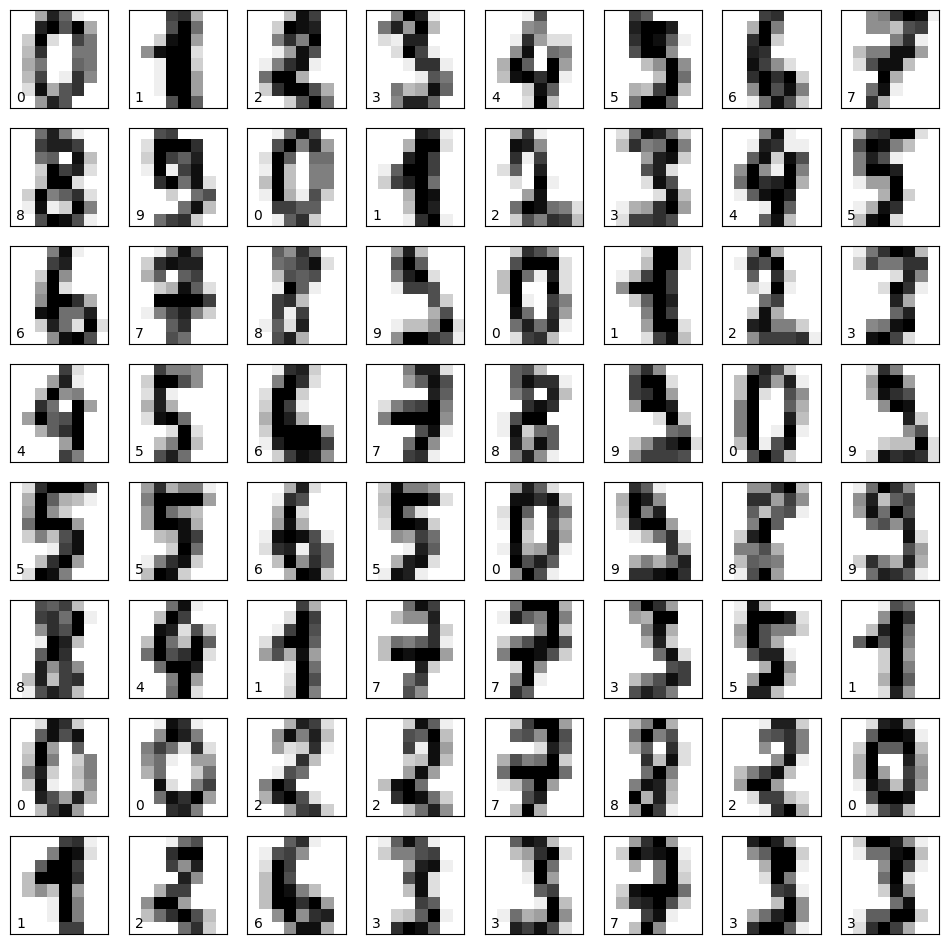

In [71]:
# set up the figure
fig = plt.figure(figsize=(12, 12))  # figure size in inches

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

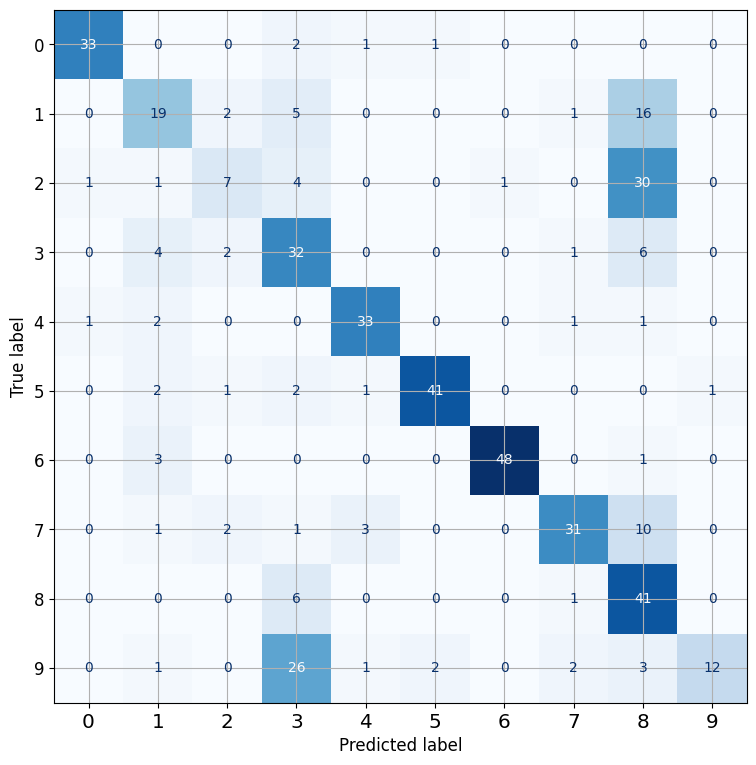

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_depth=5)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=digits.target_names)

fig, ax = plt.subplots(figsize = (9,9))

disp.plot(ax = ax, cmap=plt.cm.Blues, colorbar=False);

ax.grid()

Depth: 20: - Acc: 0.9733  - F1:0.9734
Depth: 50: - Acc: 0.9756  - F1:0.9756
Depth: 100: - Acc: 0.9844  - F1:0.9844


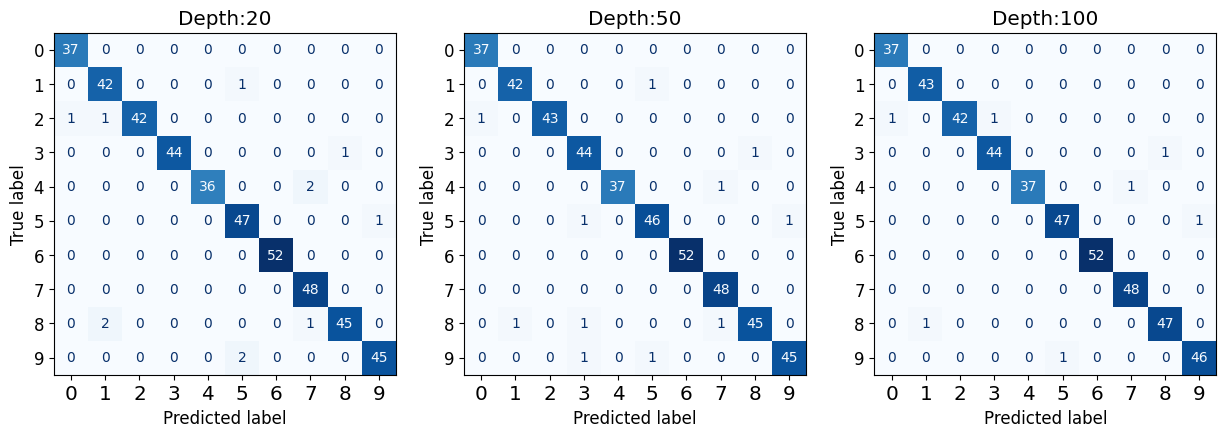

In [73]:
from sklearn.ensemble import RandomForestClassifier #### Change

fig, axes = plt.subplots(1,3, figsize = (15,6))
i = 0
for k in [20, 50, 100]: ### Change
    
    clf = RandomForestClassifier(max_depth= k) ### Change
    
    clf.fit(X_train, y_train)
    y_pred  = clf.predict(X_test)
    print (f'Depth: {k}: - Acc:{accuracy_score(y_test, y_pred): .4}', end = ' ')
    print (f' - F1:{f1_score(y_test, y_pred, average="weighted"):0.4f}')
    cm = confusion_matrix(y_test, y_pred)
    #print (cm)
    #print ('-'*50)
    ax = axes[i]
    ax.set_title(f'Depth:{k}')
    i = i+1
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=digits.target_names
                                 )
    disp.plot(ax =ax, cmap = plt.cm.Blues, colorbar=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# random forest results
fig, axes = plt.subplots(1,3, figsize = (15,8))

for i, max_depth in enumerate([3, 5, 10]):
    
    clf = RandomForestClassifier(max_depth=max_depth).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print("RF: max_depth = {:3d}".format(max_depth), end = ' | ')
    print("F1 Score : {: .4f}".format(f1_score(y_test, y_pred, average='weighted')))
    
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=digits.target_names)

    disp.plot(ax = axes[i], cmap=plt.cm.Blues, colorbar=False);
    axes[i].set_title("RF: max_depth = {0}".format(max_depth))
    axes[i].grid()

## K Neighbors Classifier

Loading Iris dataset

In [ ]:
iris = datasets.load_iris()

iris.data.shape

In [ ]:
n_samples, n_features = iris.data.shape
print (n_samples, n_features)
print( iris.data[0])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X, y = iris.data, iris.target

# get the label Names as well
target_names = iris.target_names


clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print(np.all(y == y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

In [ ]:
# helper function
from sklearn.metrics import euclidean_distances

def plot_knn_classification(X_train, y_train, X_test, n_neighbors=1):
    
    dist = euclidean_distances(X_train, X_test)
    closest = np.argsort(dist, axis=0)

    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbors[:n_neighbors]:
            plt.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                      X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    plt.scatter(X_test[:,0], X_test[:,1], s=30, c=clf.predict(X_test), marker = '*', cmap=CMAP)
    plt.scatter(X_train[:,0], X_train[:,1], s=30, c=y_train, marker = 'o', cmap=CMAP)

    #test_points = discrete_scatter(X_test[:, 0], X_test[:, 1], clf.predict(X_test), markers="*")
    #training_points = discrete_scatter(X[:, 0], X[:, 1], y)
    plt.legend(training_points + test_points, ["training class 0", "training class 1",
                                               "test pred 0", "test pred 1"])

### A better representation

In [ ]:
from sklearn.model_selection import train_test_split


#  Split the data in training and test sets to measure performance of the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE )

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# scale our data
sc = StandardScaler()

###--------------------------------
### always:
###   fit_transform train data and
###   transform only test data
###-------------------------------

X_s_train = sc.fit_transform(X_train)
X_s_test = sc.transform(X_test)    

lda = LinearDiscriminantAnalysis(n_components=2)
X_train2 = lda.fit_transform(X_s_train, y_train)
X_test2 = lda.transform(X_s_test)

In [ ]:
n_neighbors = 1

clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train2, y_train)
y_pred = clf.predict(X_test2)

In [ ]:
dist = euclidean_distances(X_train2, X_test2)
closest = np.argsort(dist, axis=0)

In [ ]:
# Lets Plot the data
plt.scatter(X_train2[:,0], X_train2[:,1], s=20, c=y_train, edgecolors='k')
plt.scatter(X_test2[:,0], X_test2[:,1], s=100, marker ='*', 
            c=y_pred, edgecolors='k')
for x, neighbors in zip(X_test2, closest.T):
    for neighbor in neighbors[:n_neighbors]:
        plt.arrow(x[0], x[1], X_train2[neighbor, 0] - x[0],
                  X_train2[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

In [ ]:
n_neighbors = 3

clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train2, y_train)
y_pred = clf.predict(X_test2)

# Lets Plot the data
plt.scatter(X_train2[:,0], X_train2[:,1], s=20, c=y_train,  edgecolors='k')
plt.scatter(X_test2[:,0], X_test2[:,1], s=100, marker ='*', 
            c=y_pred, edgecolors='k')
for x, neighbors in zip(X_test2, closest.T):
    for neighbor in neighbors[:n_neighbors]:
        plt.arrow(x[0], x[1], X_train2[neighbor, 0] - x[0],
                  X_train2[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

In [ ]:
fn_plot_decision_boundary(clf, X_train2, y_train)

In [ ]:
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10

for n_neighbors in range(1, 11):
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

fig, ax = plt.subplots()
ax.plot(range(1, 11), training_accuracy, label="Train Acc")
ax.plot(range(1, 11), test_accuracy, label="Test Acc")
ax.set_ylabel("Accuracy")
ax.set_xlabel("# neighbors")
ax.legend();

## SGD Classifier

Linear classifiers (SVM, logistic regression, etc.) with SGD training.

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning via the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

This implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

In [ ]:

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

# we create 50 separable points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)

clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]

linestyles = ["dashed", "solid", "dashed"]

colors = "k"

plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolor="black", s=50)

plt.axis("tight")

plt.grid(True)

plt.show()